In [1]:
import numpy as np
import pandas as pd
from scipy import stats, signal
from matplotlib.pyplot import *

%matplotlib inline

In [2]:
def get_mag(d):
    return np.sqrt(np.array(d.x**2+d.y**2+d.z**2))

(40, array([-0.00975748,  0.05898267,  0.1972877 ,  0.33030744,  0.3870562 ,
         0.2513518 , -0.02796029, -0.29437157, -0.27595468, -0.22089617,
        -0.18336062, -0.09912632, -0.07430951, -0.07695034, -0.10330439,
        -0.12752518, -0.12655274, -0.14258588, -0.11670343, -0.06548762,
         0.02337672,  0.09663732,  0.141857  ,  0.21992208,  0.244688  ,
         0.21309261,  0.14909269,  0.05097994, -0.02538929, -0.08695627,
        -0.14038497, -0.15308613, -0.12130851, -0.06310996, -0.01760602,
         0.01591391,  0.05002665,  0.05437263,  0.04097063,  0.02677141]))

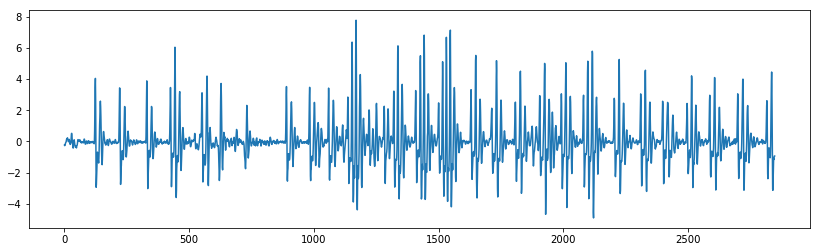

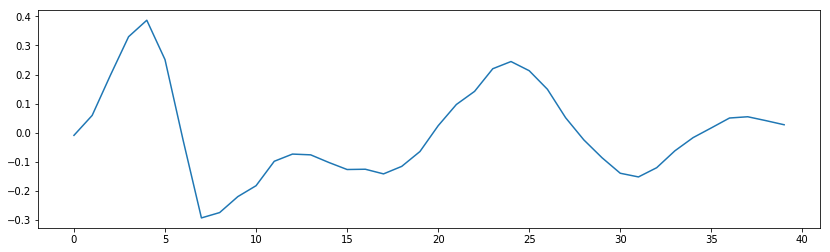

In [3]:
d = pd.read_csv('../data_accel/accurate_belly_4.csv')
Fs = 1/np.mean(np.diff(d.timestamp))
mag = get_mag(d)
mag = mag - np.mean(mag)
# b, a = signal.butter(4, (10/(Fs/2), 15/(Fs/2)), btype='band')
# mag = signal.lfilter(b, a, mag)
figure(figsize=(14,4))
plot(mag)

test = mag[120:160]
test = test - np.mean(test)
test = test / np.linalg.norm(test)
figure(figsize=(14,4))
plot(test)
(len(test), test)


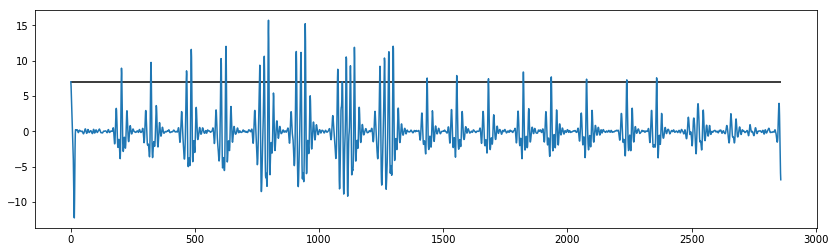

In [4]:
d = pd.read_csv('../data_accel/accurate_belly_3.csv')
mag = get_mag(d)
s = signal.convolve(mag, test[::-1], mode='same')
figure(figsize=(14,4))
plot(s)
hlines(7, 0, len(s))

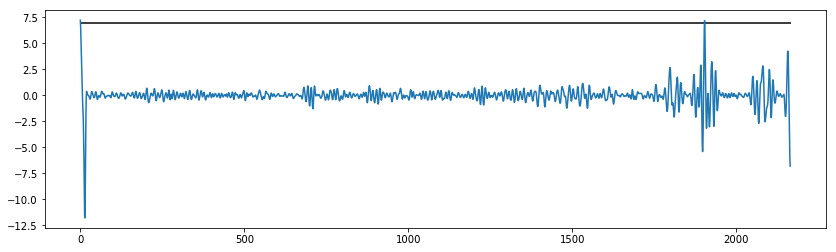

In [11]:
d = pd.read_csv('../data_accel/false_pos_rest_1.csv')
mag = get_mag(d)
s = signal.convolve(mag, test[::-1], mode='same')
figure(figsize=(14,4))
plot(s)
hlines(7, 0, len(s))

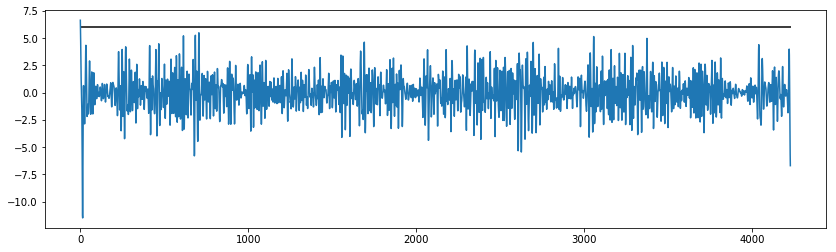

In [292]:
d = pd.read_csv('../data_accel/false_pos_driving_high_1.csv')
mag = get_mag(d)
s = signal.convolve(mag, test[::-1], mode='same')
figure(figsize=(14,4))
plot(s)
hlines(6, 0, len(s))